<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> 📷 Cifar-10 Image Classifiction 🚀 </h1> </div> 
<h5 style='text-align:center'>The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.</h5>
Any one who started their Deep learning Journey will mostly start with MNIST or CIFAR 10 as their initial problem set. MNSIT might be very easy for most of the beginers since it is a very small dataset and easy to get good accuracy, with bit of optimizations you can easily acheieve top 10% result.

**If you find this Kernal helpful , Please Upvote the notebook.**

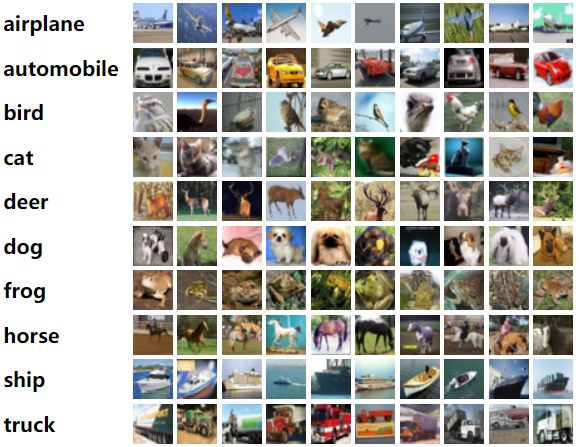

<a id='2'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Description </h2> </div> 

In this notebook i am going to build a CNN model that can classify images of various objects. We have 10 class of images:

0. **Airplane**
1. **Automobile**
1. **Bird**
1. **Cat**
1. **Deer**
1. **Dog**
1. **Frog**
1. **Horse**
1. **Ship**
1. **Truck**


<a id='3'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Loading Libraries </h2> </div> 

In [ ]:
# basic
import numpy as np
import pandas as pd

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# keras

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.experimental import SGD,Adam

# Warnings
import warnings
warnings.filterwarnings('ignore')

<a id='4'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Get the data </h2> </div>


In [11]:
# unpack the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

# printing the shape
print('The shape of train:',X_train.shape)
print('The shape of train_label:',y_train.shape)
print('The shape of test:',X_test.shape)
print('The shape of train_label:',y_test.shape)

The shape of train: (50000, 32, 32, 3)
The shape of train_label: (50000, 1)
The shape of test: (10000, 32, 32, 3)
The shape of train_label: (10000, 1)


<a id='5'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Exploration </h2> </div>

First, start by visualizing the variable of interest. 

Let's view more images in a grid format.

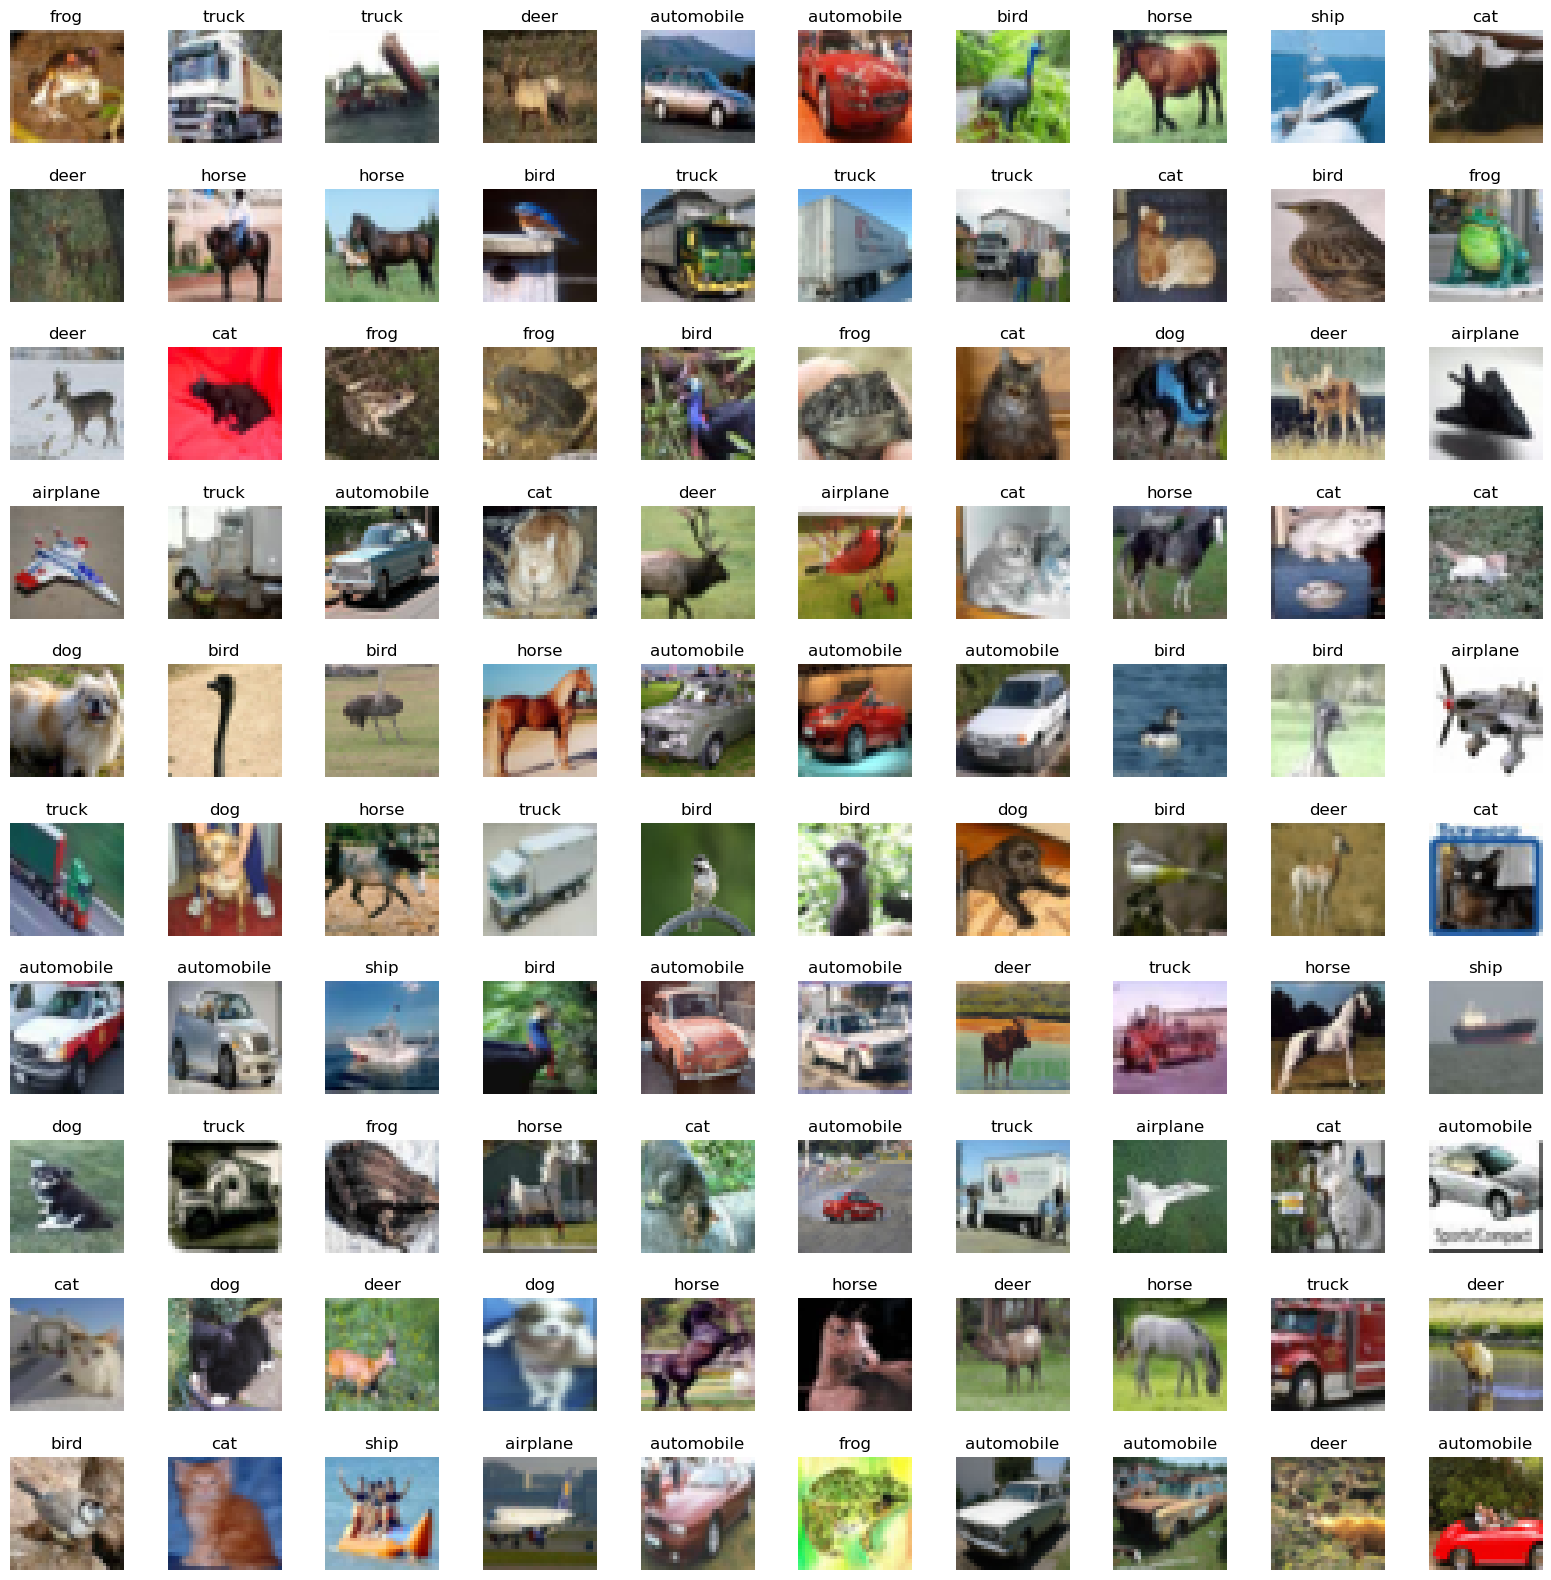

In [12]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(100):
    
    plt.subplot(10,10,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_train[i])
    plt.title(labels[int(y_train[i])],fontsize=12)
    plt.axis('off')

plt.show()

Now will Create a barplot to see the class distrubtion in trainting and testing set.

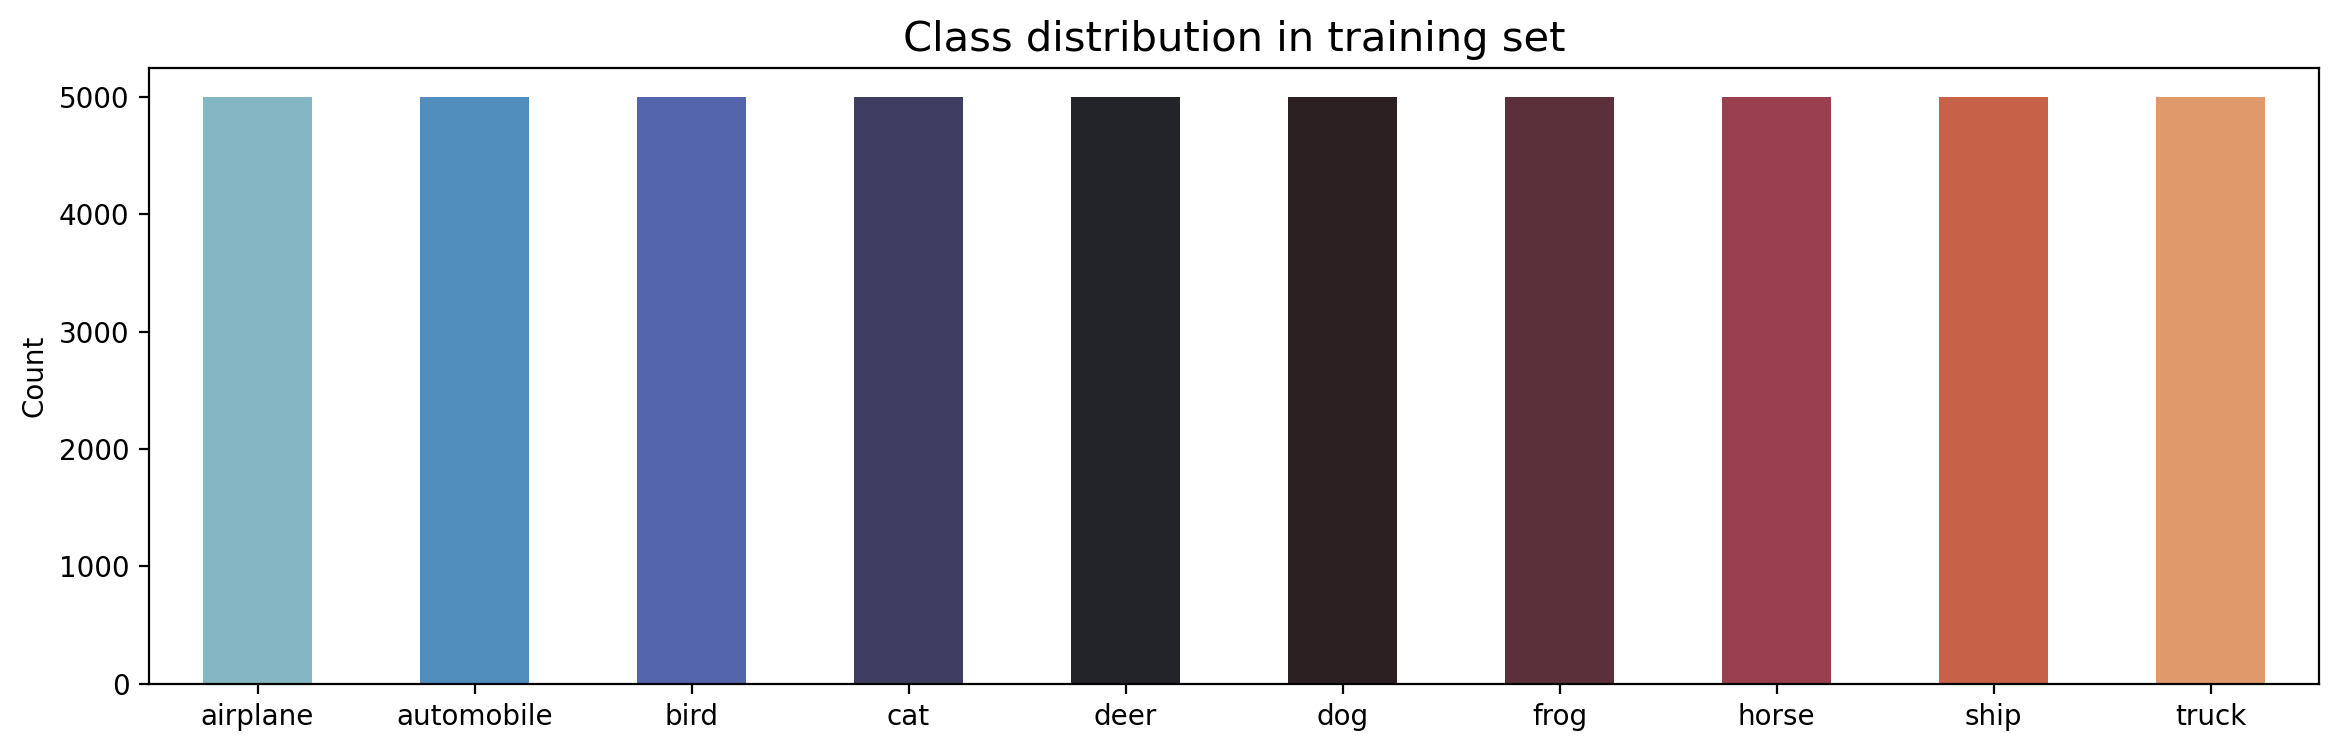

In [13]:
# count for Training dataset
label,count = np.unique(y_train,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in training set',fontsize=15)
plt.show()

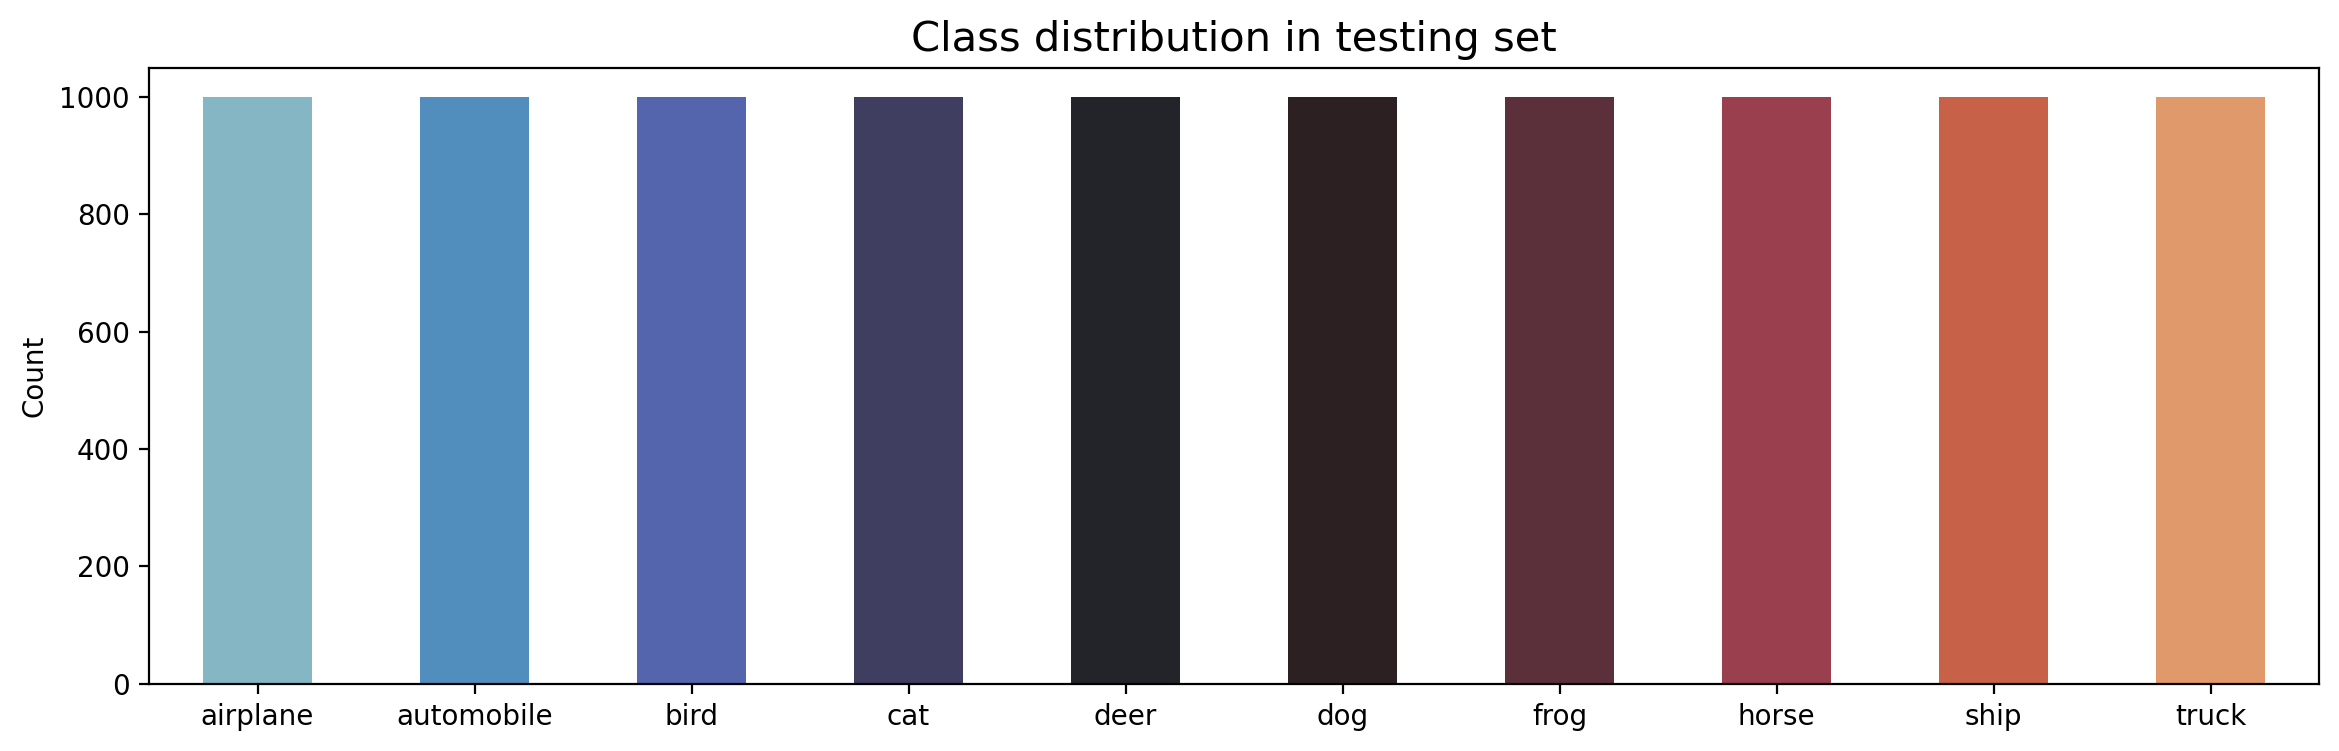

In [14]:
# count for Testing dataset
label,count = np.unique(y_test,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in testing set',fontsize=15)
plt.show()

<a id='6'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation </h2> </div>

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data.

1. **Normalization:**
 For normalizing the pixel data (Image) we can simply divide the whole pixel values with 255 since pixel values ranges from 0-255. So if we divide them with 255 we automatically normalizee the data between 0-1.
2. **One hot encoding:** 
CIFAR 10 has 10 categories, in general we should label the categorical data using the one hot encoding.

In [15]:
# function to change the data type and normalize the data
def pre_process(data):
    #data = data.astype('float32')
    return data/255

# function to chnage the labels into categorical data
def to_cat(data):
    return to_categorical(data,num_classes=10)

In [16]:
# Noramlise the data
X_train = pre_process(X_train)
X_test = pre_process(X_test)

# to categorical data
y_train = to_cat(y_train)
y_test = to_cat(y_test)

<a id='7'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model </h2> </div>

<a id ='8'></a>
<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black"> Baseline Model (VGG 3 Blocks) </h3> </div>
Start with 3 basic VGG CNN layers, where each layer is attached to a maxpool layer. Max pooling is a great way to reduce the size of parameters with out loosing much information. Asusual in any deep learning model we need to flatten the intermediate layers results and pass them to a Dense network. Then the dense network result will be passes to a final output layer where the number of units represent the number of categories in the data which is 10 in our case. Softmax is chosen as final activation because we need the highest probable class out of 10.

In [17]:
in_shape = X_train[0].shape
# Model 
base_model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block1
base_model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape,))
base_model.add(Conv2D(32,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))
# block 2
base_model.add(Conv2D(64,3,activation='relu',padding='same'))
base_model.add(Conv2D(64,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))
# block 3
base_model.add(Conv2D(128,3,activation='relu',padding='same'))
base_model.add(Conv2D(128,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))

# Head of the model
base_model.add(Flatten())
base_model.add(Dense(128,activation='relu'))
base_model.add(Dense(10,activation='softmax'))


# compile
opt = SGD(learning_rate=0.01,momentum=0.9)
base_model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# callback
#early_stoping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Model fit
base_history = base_model.fit(X_train,y_train,
                              batch_size = 64,
                              validation_data = (X_test,y_test),
                              epochs = 50,
                              #callbacks=[early_stoping],
                              verbose = 0
                             )

# model summary
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

**Evaluation of Base model**

The accuracy of the Base Model is: 72.29999899864197
The Loss of the Base Model is: 2.0282514095306396


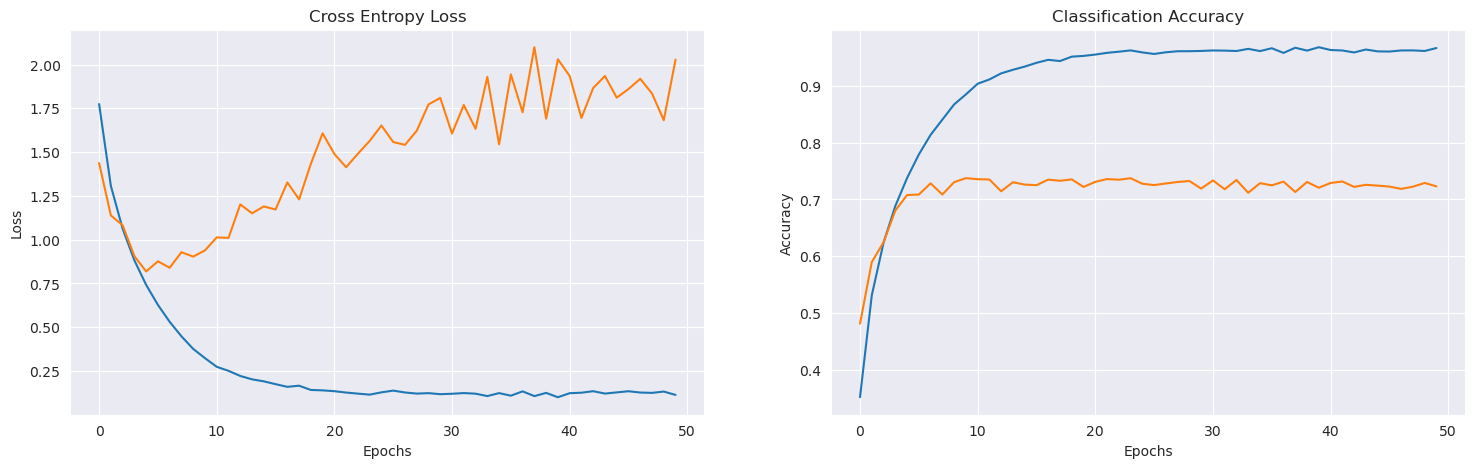

In [18]:
# Evaluvate
loss0,acc0=base_model.evaluate(X_test,y_test,batch_size = 64, verbose = 0)

print('The accuracy of the Base Model is:',acc0*100)
print('The Loss of the Base Model is:',loss0)

# plots for accuracy and Loss with epochs
sns.set_style('darkgrid')

error = pd.DataFrame(base_history.history)

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

<a id ='9'></a>
<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black">Improving Model </h3> </div>

 Observe the model training log above you can see that Validation loss is increasing a lot which means our model is overfitting.

Overfitting means our model performs good on the training data set but fails to generalize on the unseen data. Lets try to reduce overfitting.

<h4>Now i have established a baseline model, the VGG architecture with three blocks, i can investigate modifications to the model and the training algorithm that seek to improve performance. Will look at two main areas to address the severe overfitting observed, namely regularization and data augmentation.</h4>

<a id ='10'></a>
<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:blue"> Adding Dropout </h3> </div>

So lets regularize the model. In deep learning drop out is very good form of regularization.

What is dropout?

> Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.
<h5 style="text-align:Center;color:crimson">We will add Dropout layers after each max pooling layer and after the fully connected layer, and
use a fixed dropout rate of 20%.</h5>

In [19]:
# loading Data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

# preprocess
X_train = pre_process(X_train)
X_test = pre_process(X_test)

y_train = to_cat(y_train)
y_test = to_cat(y_test)


in_shape = X_train[0].shape

# Model 
base_model1 = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block1
base_model1.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape,))
base_model1.add(Conv2D(32,3,activation='relu',padding='same'))
base_model1.add(MaxPool2D(2))
base_model1.add(Dropout(0.2))   # Add dropout to reduce overfitting

# block 2
base_model1.add(Conv2D(64,3,activation='relu',padding='same'))
base_model1.add(Conv2D(64,3,activation='relu',padding='same'))
base_model1.add(MaxPool2D(2))
base_model1.add(Dropout(0.2))   # Add dropout to reduce overfitting

# block 3
base_model1.add(Conv2D(128,3,activation='relu',padding='same'))
base_model1.add(Conv2D(128,3,activation='relu',padding='same'))
base_model1.add(MaxPool2D(2))
base_model1.add(Dropout(0.2))   # Add dropout to reduce overfitting

# Head of the model
base_model1.add(Flatten())
base_model1.add(Dense(128,activation='relu'))
base_model1.add(Dropout(0.2))      # Add dropout to reduce overfitting
base_model1.add(Dense(10,activation='softmax'))

# compile
opt = SGD(learning_rate=0.01,momentum=0.9)
base_model1.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# callback
early_stoping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Model fit
base_history1 = base_model1.fit(X_train,y_train,
                              batch_size = 64,
                              validation_data = (X_test,y_test),
                              epochs = 50,
                              callbacks=[early_stoping],
                              verbose = 0)
# model summary
base_model1.summary()

2023-08-25 09:50:33.451361: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

**Evaluvation of Dropout model**

The accuracy of the Dropout Model is: 80.98000288009644
The Loss of the dropout Model is: 0.595325231552124


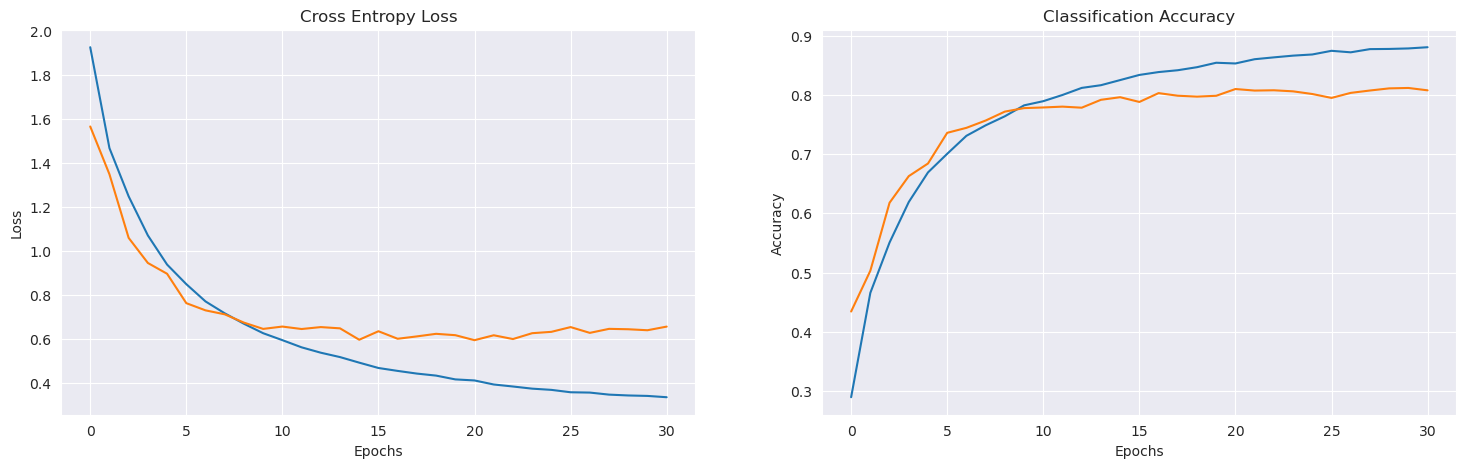

In [20]:
# Evaluvate
loss1,acc1=base_model1.evaluate(X_test,y_test,batch_size = 64, verbose = 0)

print('The accuracy of the Dropout Model is:',acc1*100)
print('The Loss of the dropout Model is:',loss1)

# plots for accuracy and Loss with epochs

error = pd.DataFrame(base_history1.history)

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

<a id ='11'></a>
<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:blue"> Data Augmentation and Dropout </h3> </div>


To reduce overfitting we agreed that adding more data will reduce overfitting. Even when our model doesnt overfits, its very good idea to add more data if you can. But collecting data is very tough and also data preprocessing is not as fancy it sounds. But what if we can genrate data from our existing data. We already have 60K images and we can generate lots and lots of images out of it
<h5 style="text-align:left;color:crimson">
    
* The types of random augmentations that could be useful include a horizontal flip, minor shifts of the image, and perhaps small zooming or cropping of the image. 
This can be implemented in Keras using the ImageDataGenerator class.
    
* we will be using the dropout layers also.</h5>

In [21]:
# loading Data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
# preprocess
X_train = pre_process(X_train)
X_test = pre_process(X_test)
y_train = to_cat(y_train)
y_test = to_cat(y_test)



in_shape = X_train[0].shape
# Model 2
base_model2 = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block1
base_model2.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape))
base_model2.add(Conv2D(32,3,activation='relu',padding='same'))
base_model2.add(MaxPool2D(2))
base_model2.add(Dropout(0.2))

# block 2
base_model2.add(Conv2D(64,3,activation='relu',padding='same'))
base_model2.add(Conv2D(64,3,activation='relu',padding='same'))
base_model2.add(MaxPool2D(2))
base_model2.add(Dropout(0.2))

# block 3
base_model2.add(Conv2D(128,3,activation='relu',padding='same'))
base_model2.add(Conv2D(128,3,activation='relu',padding='same'))
base_model2.add(MaxPool2D(2))
base_model2.add(Dropout(0.2))

# Head of the model
base_model2.add(Flatten())
base_model2.add(Dense(128,activation='relu'))
base_model2.add(Dropout(0.2))
base_model2.add(Dense(10,activation='softmax'))


# compile
opt = SGD(learning_rate=0.01,momentum=0.9)
base_model2.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augementation
datagen = ImageDataGenerator(rotation_range=10,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1
                            )
train_gen = datagen.flow(X_train,y_train,batch_size=64)

# Model fit
base_history2 = base_model2.fit(train_gen,
                                steps_per_epoch = int(X_train.shape[0] // 64),
                                validation_data = (X_test,y_test),
                                epochs = 50,
                                verbose = 0)
# model summary
base_model2.summary()

2023-08-25 09:54:59.664760: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

**Evaluvation of Data Augmentation and Dropout model**

The accuracy of the Base Model is: 84.24000144004822
The Loss of the Base Model is: 0.49309399724006653


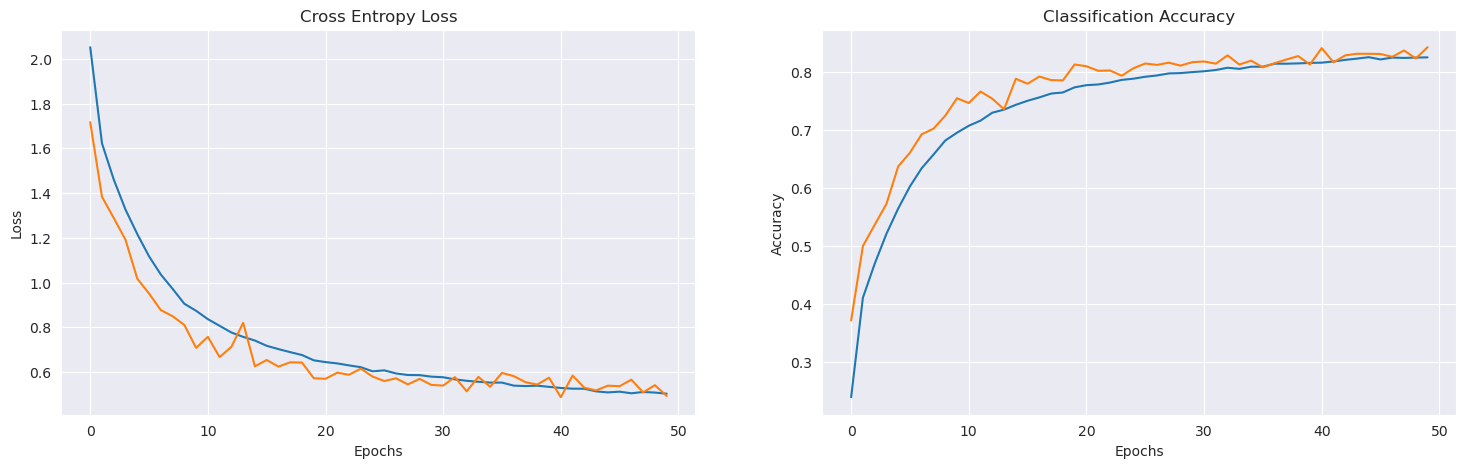

In [22]:
# Evaluvate
loss2,acc2=base_model2.evaluate(X_test,y_test,batch_size = 64, verbose = 0)

print('The accuracy of the Base Model is:',acc2*100)
print('The Loss of the Base Model is:',loss2)

# plots for accuracy and Loss with epochs

error = pd.DataFrame(base_history2.history)

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

<a id ='12'></a>
<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:blue"> Dropout and Data Augmentation and Batch Normalization </h3> </div>



Batch normalization works just the same way as we normalize the input data where we divided the x_train/255. What we are trying to do there is we are arranging all the features in same scale so that model converges easily and we can reduce the distrotions. Our input layer is lucky enough to have everything in same scale why not the rest of the layers?

This is what exactly we do in batch normalization, when ever we passs the CNN throuh a batch normalization layer we are normalizing the weights so that our model will be stable and we can train model longer and also use larger learning rate.

Also the kind of normalization we use is batch normalization which means we compute mean and varience for each mini batch not the whole data.
<h5 style="text-align:left;color:crimson">
    
* I can add batch normalization in an effort to stabilize the learning and perhaps accelerate the learning process.

* I can change dropout from a fixed amount at each level, to instead using an increasing trend with less dropout in early layers and more dropout in later layers, increasing 10% each time from 20% after the first block to 50% at the fully connected layer. This type of increasing dropout with the depth of the model is a common pattern. It is effective as it forces layers deep in the model to regularize more than layers closer to the input

In [23]:
# load data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
# preprocess
X_train = pre_process(X_train)
X_test = pre_process(X_test)
y_train = to_cat(y_train)
y_test = to_cat(y_test)

in_shape = X_train[0].shape
# Model 
model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
base_model.add(Dropout(0.2))  

# block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.3))

# block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.4))

# Head of the model
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

# compile
#opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# callback
early_stoping = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Data Augementation
datagen = ImageDataGenerator(rotation_range=10,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1
                                )
train_gen = datagen.flow(X_train,y_train,batch_size=64)


# Model fit
model_history = model.fit(train_gen,
                          validation_data = (X_test,y_test),
                          epochs = 200,
                          callbacks=[early_stoping],
                          verbose = 0)
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

2023-08-25 10:23:13.520847: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

**Final Model Layout**

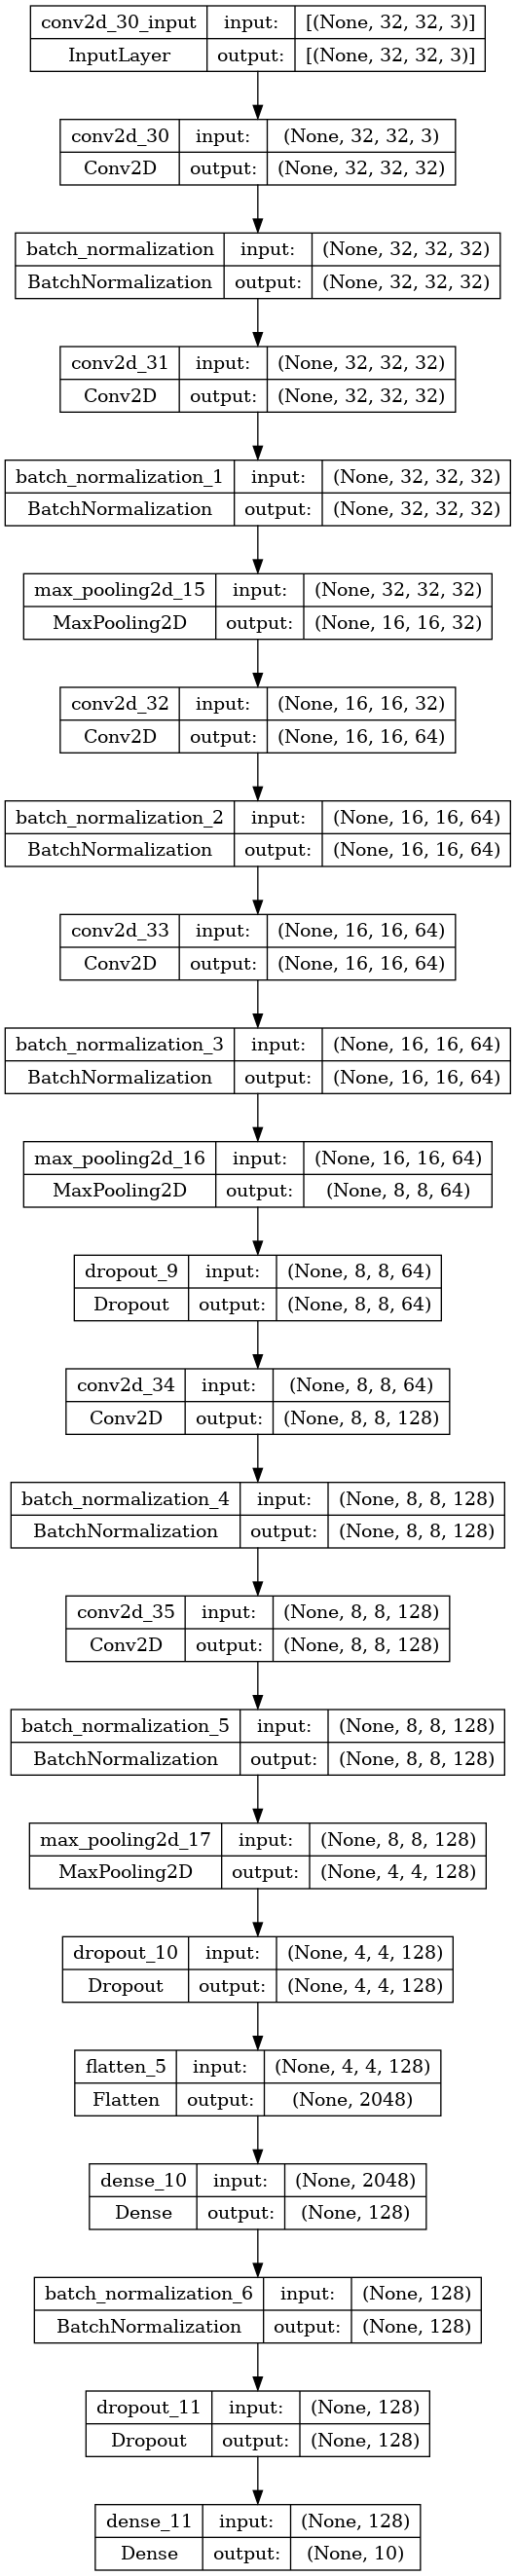

In [76]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True)

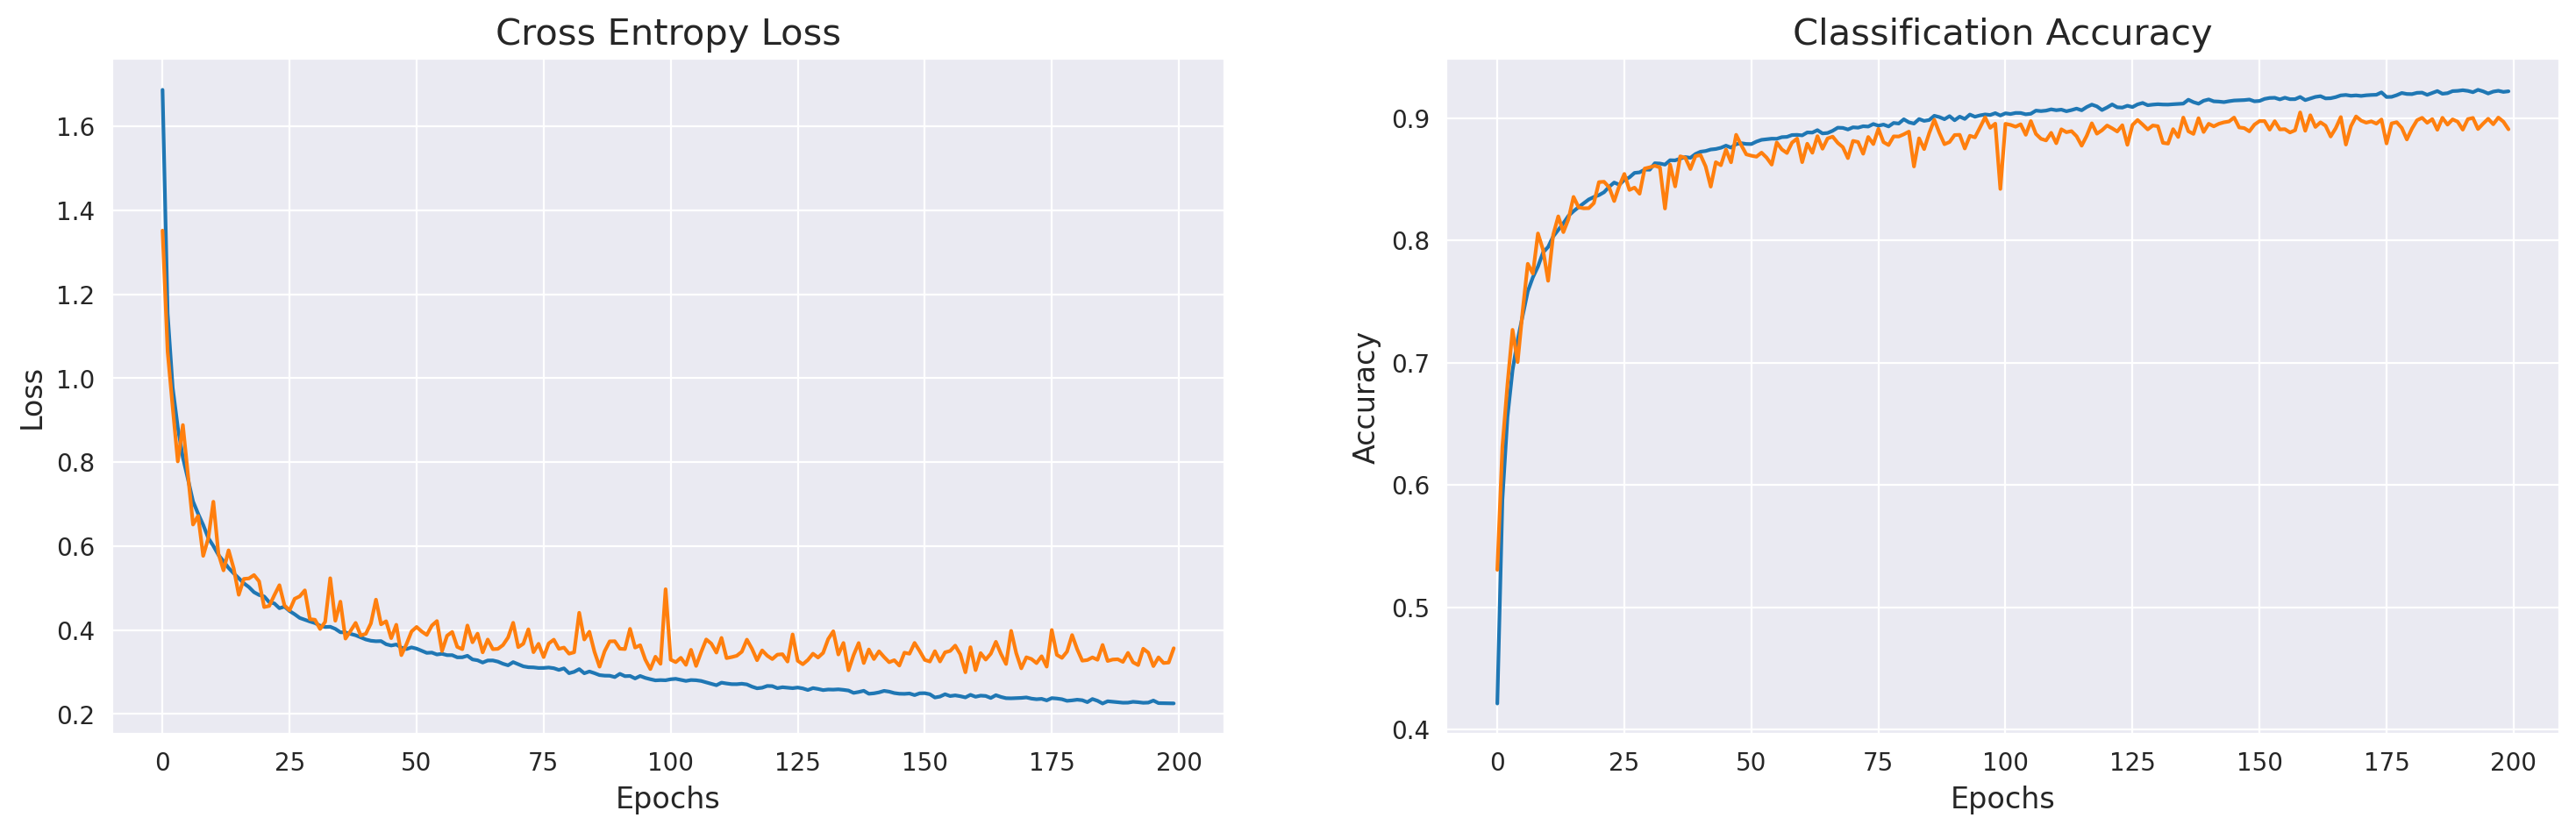

In [107]:
# Evaluvate
#loss3,acc3 = model.evaluate(X_test,y_test,batch_size = 64, verbose = 0)

#print('The accuracy of the Base Model is:',acc3*100)
#print('The Loss of the Base Model is:',loss3)

# plots for accuracy and Loss with epochs

error = pd.DataFrame(model_history.history)

plt.figure(figsize=(18,5),dpi=200)

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [47]:
model.save('cifar_cnn_sachin.h5')

<a id='13'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black">Model Evaluation  📊  </h2> </div> 

In [33]:
accuracy = pd.DataFrame({'Model_name':['Base_model','Dropout','Data_augemtaion + Dropout','Dropout + Data Augmentation + Batch Normalization'],'Accuracy':[acc0*100,acc1*100,acc2*100,acc3*100]})
accuracy

,Model_name,Accuracy
0,Base_model,72.299999
1,Dropout,80.980003
2,Data_augemtaion + Dropout,84.240001
3,Dropout + Data Augmentation + Batch Normalization,89.080000


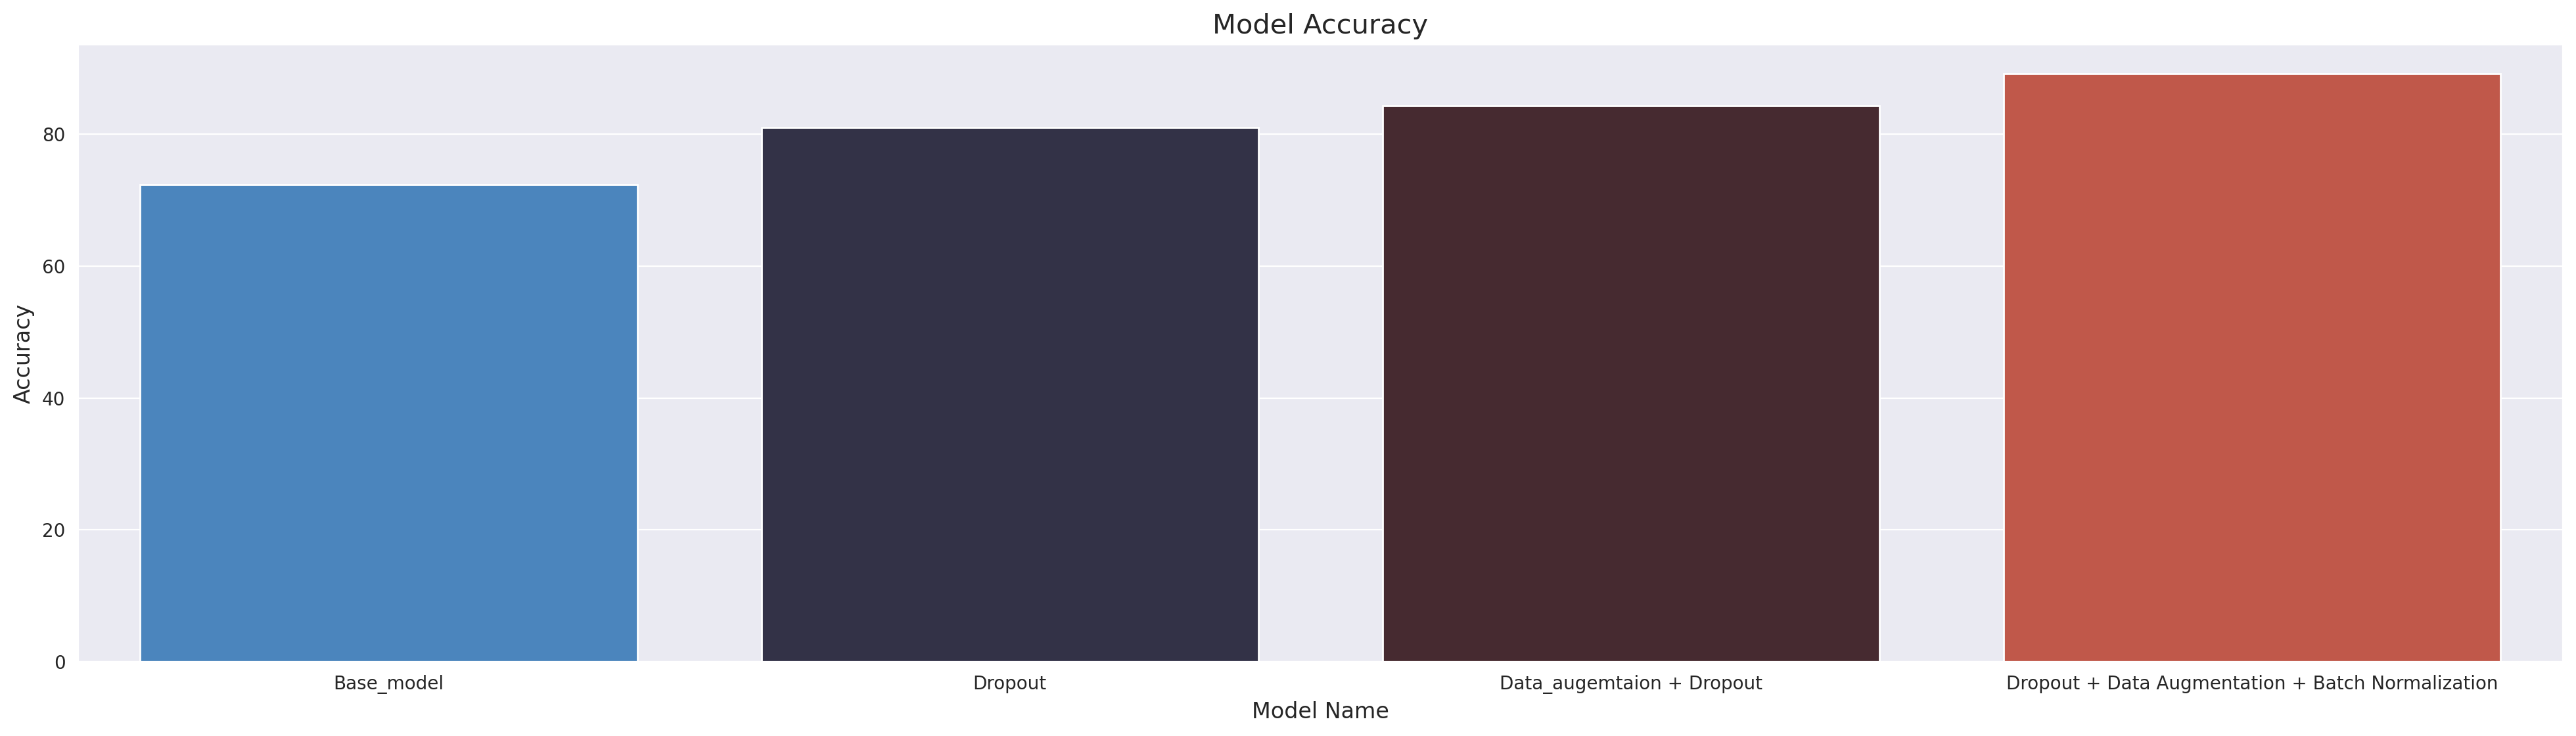

In [110]:
plt.figure(figsize=(20,6),dpi=200)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.barplot(data=accuracy,x='Model_name',y='Accuracy',palette='icefire')
plt.title('Model Accuracy',fontsize=15)
plt.xlabel('Model Name',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.tight_layout()
plt.show()

In [66]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 3ms/step


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1000
           1       0.92      0.96      0.94      1000
           2       0.89      0.87      0.88      1000
           3       0.81      0.76      0.78      1000
           4       0.90      0.89      0.89      1000
           5       0.93      0.75      0.83      1000
           6       0.79      0.98      0.88      1000
           7       0.94      0.92      0.93      1000
           8       0.95      0.93      0.94      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

